In [1]:
# data access
import earthaccess

# custom tool functions
import importlib
import tools
import makeL3_scripts
importlib.reload(tools)
importlib.reload(makeL3_scripts)
from tools import *
from makeL3_scripts import makeL3, path_to_gridded_ds

# data manipulation
import os
import numpy as np
import xarray as xr
import cf_xarray  # noqa: F401
import rasterio
import rioxarray as rio

from rasterio.enums import Resampling
from tqdm import tqdm

# plotting
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
tspan = ("2025-07-01", "2025-08-01")
sep_bbox = (-110, 10, -70, 35) # SEP, WSEN
so_bbox = (-170,-60,-120,-50) # SO, WSEN

#####

bbox = sep_bbox
loc = "SEP"
res = 1.0
strres = {1.0:"1deg", 0.1:"0p1deg"}[res]

In [4]:
results = earthaccess.search_data(
    short_name="PACE_HARP2_L2_CLOUD_GPC_NRT",
    temporal=tspan,
    bounding_box=bbox,
)
len(results)

184

In [5]:
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/184 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/184 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/184 [00:00<?, ?it/s]

In [6]:
ds = makeL3(paths, bbox, resolution=res)

100%|██████████| 184/184 [16:17<00:00,  5.31s/it]


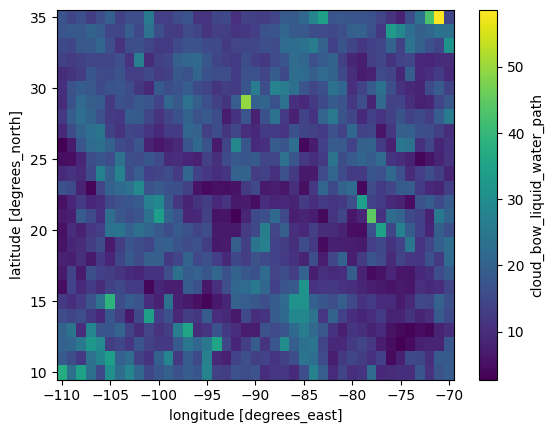

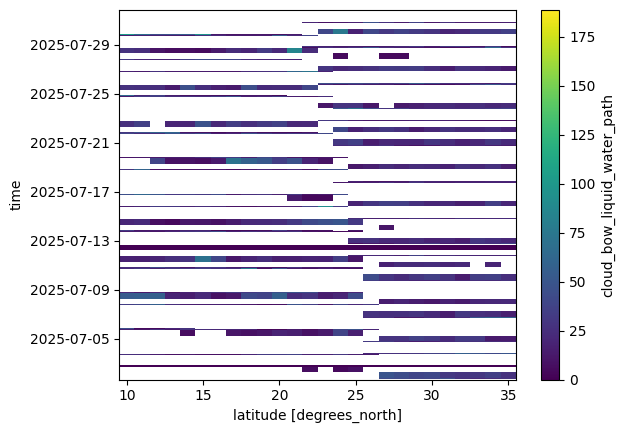

In [7]:
ds.cloud_bow_liquid_water_path.mean("time").plot()
plt.show()

ds.cloud_bow_liquid_water_path.mean("longitude").plot()
plt.show()

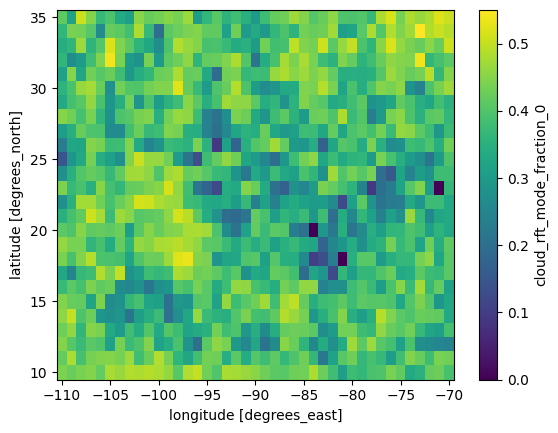

In [8]:
ds.cloud_rft_mode_fraction_0.mean("time").plot()
plt.show()

In [9]:
filesave="/home/jovyan/shared-public/mucloud-hackweek2025-data/harpL3."+loc+"."+strres+".nc"
print(filesave)

/home/jovyan/shared-public/mucloud-hackweek2025-data/harpL3.SEP.1deg.nc


In [10]:
if os.path.exists(filesave):
    os.remove(filesave)
ds.to_netcdf(filesave)